## Course 5
### Python Project: pillow, tesseract, and opencv

Started in 29 Aug, 2020

In [1]:
import PIL

print(PIL.__version__)

7.2.0


In [2]:
help(PIL)

Help on package PIL:

NAME
    PIL - Pillow (Fork of the Python Imaging Library)

DESCRIPTION
    Pillow is the friendly PIL fork by Alex Clark and Contributors.
        https://github.com/python-pillow/Pillow/
    
    Pillow is forked from PIL 1.1.7.
    
    PIL is the Python Imaging Library by Fredrik Lundh and Contributors.
    Copyright (c) 1999 by Secret Labs AB.
    
    Use PIL.__version__ for this Pillow version.
    
    ;-)

PACKAGE CONTENTS
    BdfFontFile
    BlpImagePlugin
    BmpImagePlugin
    BufrStubImagePlugin
    ContainerIO
    CurImagePlugin
    DcxImagePlugin
    DdsImagePlugin
    EpsImagePlugin
    ExifTags
    FitsStubImagePlugin
    FliImagePlugin
    FontFile
    FpxImagePlugin
    FtexImagePlugin
    GbrImagePlugin
    GdImageFile
    GifImagePlugin
    GimpGradientFile
    GimpPaletteFile
    GribStubImagePlugin
    Hdf5StubImagePlugin
    IcnsImagePlugin
    IcoImagePlugin
    ImImagePlugin
    Image
    ImageChops
    ImageCms
    ImageColor
    ImageDr

In [3]:
from PIL import Image


In [4]:
help(Image)

Help on module PIL.Image in PIL:

NAME
    PIL.Image

DESCRIPTION
    # The Python Imaging Library.
    # $Id$
    #
    # the Image class wrapper
    #
    # partial release history:
    # 1995-09-09 fl   Created
    # 1996-03-11 fl   PIL release 0.0 (proof of concept)
    # 1996-04-30 fl   PIL release 0.1b1
    # 1999-07-28 fl   PIL release 1.0 final
    # 2000-06-07 fl   PIL release 1.1
    # 2000-10-20 fl   PIL release 1.1.1
    # 2001-05-07 fl   PIL release 1.1.2
    # 2002-03-15 fl   PIL release 1.1.3
    # 2003-05-10 fl   PIL release 1.1.4
    # 2005-03-28 fl   PIL release 1.1.5
    # 2006-12-02 fl   PIL release 1.1.6
    # 2009-11-15 fl   PIL release 1.1.7
    #
    # Copyright (c) 1997-2009 by Secret Labs AB.  All rights reserved.
    # Copyright (c) 1995-2009 by Fredrik Lundh.
    #
    # See the README file for information on usage and redistribution.
    #

CLASSES
    builtins.Exception(builtins.BaseException)
        DecompressionBombError
    builtins.RuntimeWarning(buil

In [5]:
help(Image.open)

Help on function open in module PIL.Image:

open(fp, mode='r')
    Opens and identifies the given image file.
    
    This is a lazy operation; this function identifies the file, but
    the file remains open and the actual image data is not read from
    the file until you try to process the data (or call the
    :py:meth:`~PIL.Image.Image.load` method).  See
    :py:func:`~PIL.Image.new`. See :ref:`file-handling`.
    
    :param fp: A filename (string), pathlib.Path object or a file object.
       The file object must implement :py:meth:`~file.read`,
       :py:meth:`~file.seek`, and :py:meth:`~file.tell` methods,
       and be opened in binary mode.
    :param mode: The mode.  If given, this argument must be "r".
    :returns: An :py:class:`~PIL.Image.Image` object.
    :exception FileNotFoundError: If the file cannot be found.
    :exception PIL.UnidentifiedImageError: If the image cannot be opened and
       identified.
    :exception ValueError: If the ``mode`` is not "r", or i

In [8]:
file  = 'images/index.png'
image =  Image.open(file)

In [10]:
print(image)

<PIL.PngImagePlugin.PngImageFile image mode=P size=800x450 at 0x7F8A23CAF760>


In [13]:
import inspect

inspect.getmro(type(image))

(PIL.PngImagePlugin.PngImageFile,
 PIL.ImageFile.ImageFile,
 PIL.Image.Image,
 object)

In [14]:
type(image)

PIL.PngImagePlugin.PngImageFile

In [15]:
image.show()

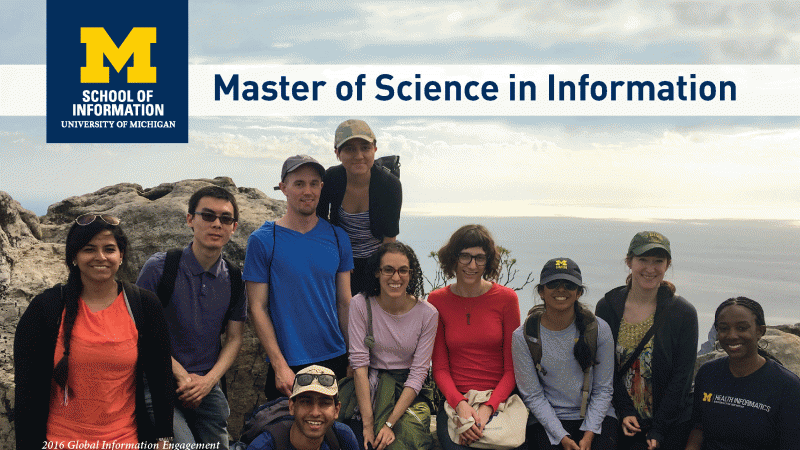

In [16]:
from IPython.display import display

display(image)

In [17]:
help(image.copy)

Help on method copy in module PIL.Image:

copy() method of PIL.PngImagePlugin.PngImageFile instance
    Copies this image. Use this method if you wish to paste things
    into an image, but still retain the original.
    
    :rtype: :py:class:`~PIL.Image.Image`
    :returns: An :py:class:`~PIL.Image.Image` object.



In [18]:
from PIL import ImageFilter

In [19]:
image =  image.convert('RGB')

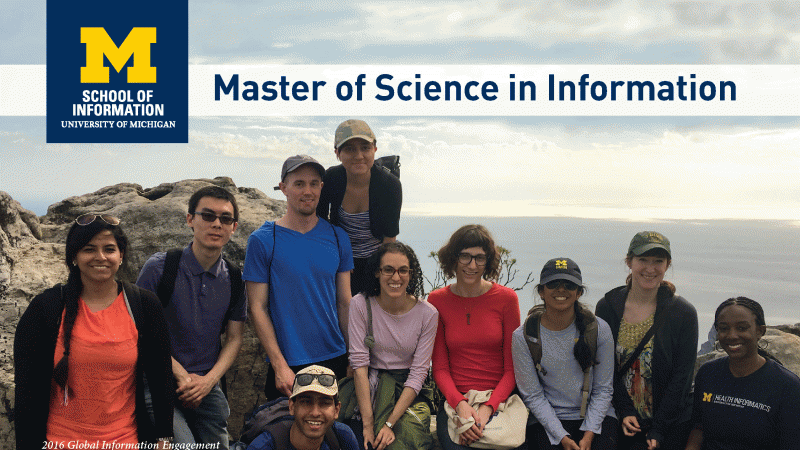

In [20]:
image

In [22]:
blured_image =  image.filter(PIL.ImageFilter.BLUR)

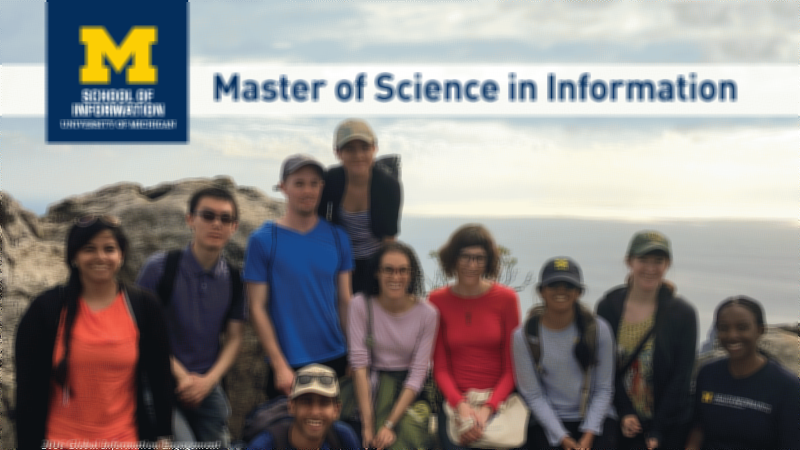

In [23]:
display(blured_image)

In [25]:
print('{} {}'. format(image.height, image.width))

450 800


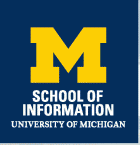

In [33]:
display(image.crop((50,0,190,145)))

In [35]:
croped_image = image.crop((50,0,190,145))

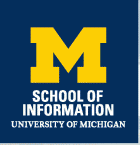

In [36]:
croped_image

In [38]:
from PIL import ImageDraw
drawing_object=ImageDraw.Draw(image)
drawing_object.rectangle((50,0,190,150), fill = None, outline ='red')


## Draw on Image

In [43]:
from PIL import ImageDraw

drawing = ImageDraw.Draw(image)

In [44]:
display(drawing)

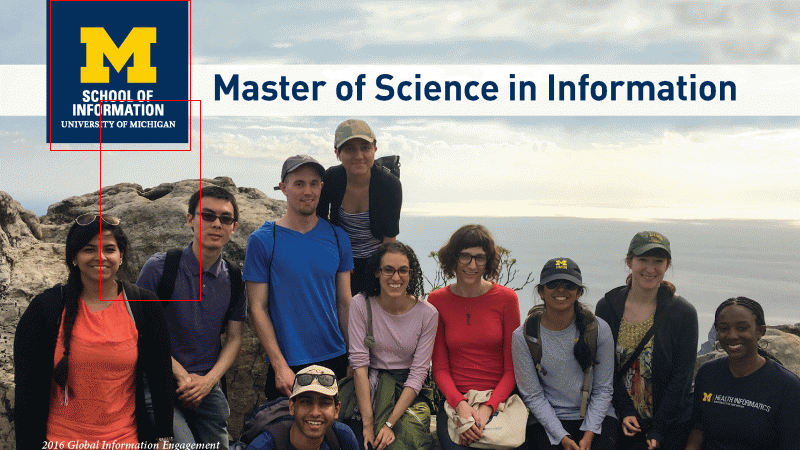

In [46]:
from PIL import ImageDraw
drawing_object=ImageDraw.Draw(image)
drawing_object.rectangle((50,0,190,150), fill = None, outline ='red')
display(image)

## Aditional Image Function

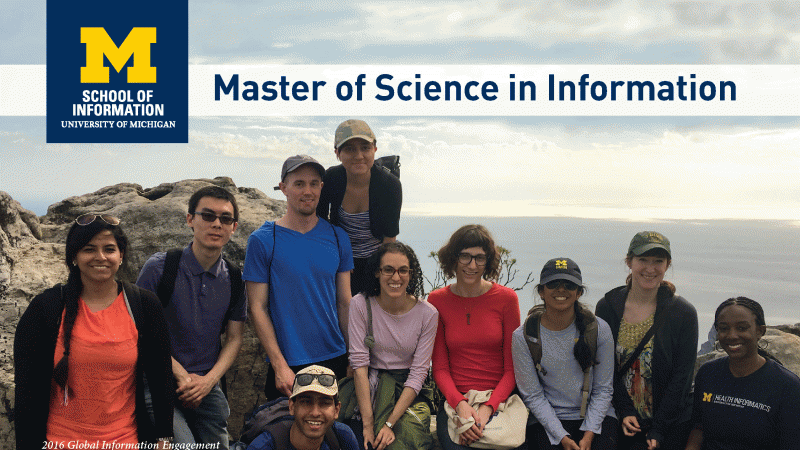

In [2]:
import PIL
from PIL import Image
from IPython.display import display

# And lets load the image we were working, and we can just convert it to RGB inline
file="images/index.png"
image=Image.open(file).convert('RGB')

display(image)


In [3]:
from PIL import ImageEnhance
# Checking the online documentation for this function, it takes a value between 0.0 (a completely black
# image) and 1.0 (the original image) to adjust the brightness. All of the classes in the ImageEnhance module
# do this the same way, you create an object, in this case Brightness, then you call the enhance function()
# on that object with an appropriate parameter.
#
# Lets write a little loop to generate ten images of different brightness. First we need the Brightness
# object with our image
enhancer=ImageEnhance.Brightness(image)
images=[]
for i in range(0, 10):
    # We'll divide i by ten to get the decimal value we want, and append it to the images list
    # we actually call the brightness routine by calling the enhance() function. Remember, you can dig into
    # details of this using the help() function, or by consulting web docs
    images.append(enhancer.enhance(i/10))
# We can see the result here is a list of ten PIL.Image.Image objects. Jupyter nicely prints out the value
# of python objects nested in lists
print(images)

[<PIL.Image.Image image mode=RGB size=800x450 at 0x7F7FD67E9850>, <PIL.Image.Image image mode=RGB size=800x450 at 0x7F7FD67B5850>, <PIL.Image.Image image mode=RGB size=800x450 at 0x7F7FD67B57C0>, <PIL.Image.Image image mode=RGB size=800x450 at 0x7F7FD67B57F0>, <PIL.Image.Image image mode=RGB size=800x450 at 0x7F7FD67B5820>, <PIL.Image.Image image mode=RGB size=800x450 at 0x7F7FD67B5880>, <PIL.Image.Image image mode=RGB size=800x450 at 0x7F7FD67B58B0>, <PIL.Image.Image image mode=RGB size=800x450 at 0x7F7FD67B5910>, <PIL.Image.Image image mode=RGB size=800x450 at 0x7F7FD67B5940>, <PIL.Image.Image image mode=RGB size=800x450 at 0x7F7FD67B5970>]


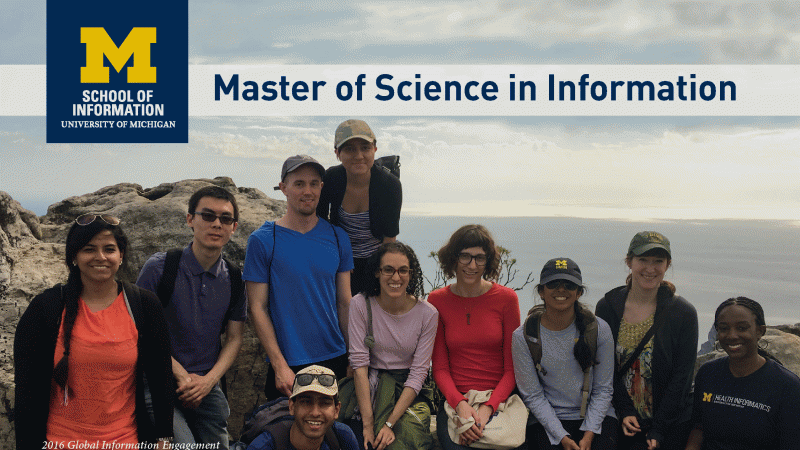

In [7]:
display(images[9])

In [8]:
first_image=images[0]

In [9]:
first_image.mode

'RGB'

In [10]:
contact_sheet =  PIL.Image.new(first_image.mode, (first_image.width,10*first_image.height))

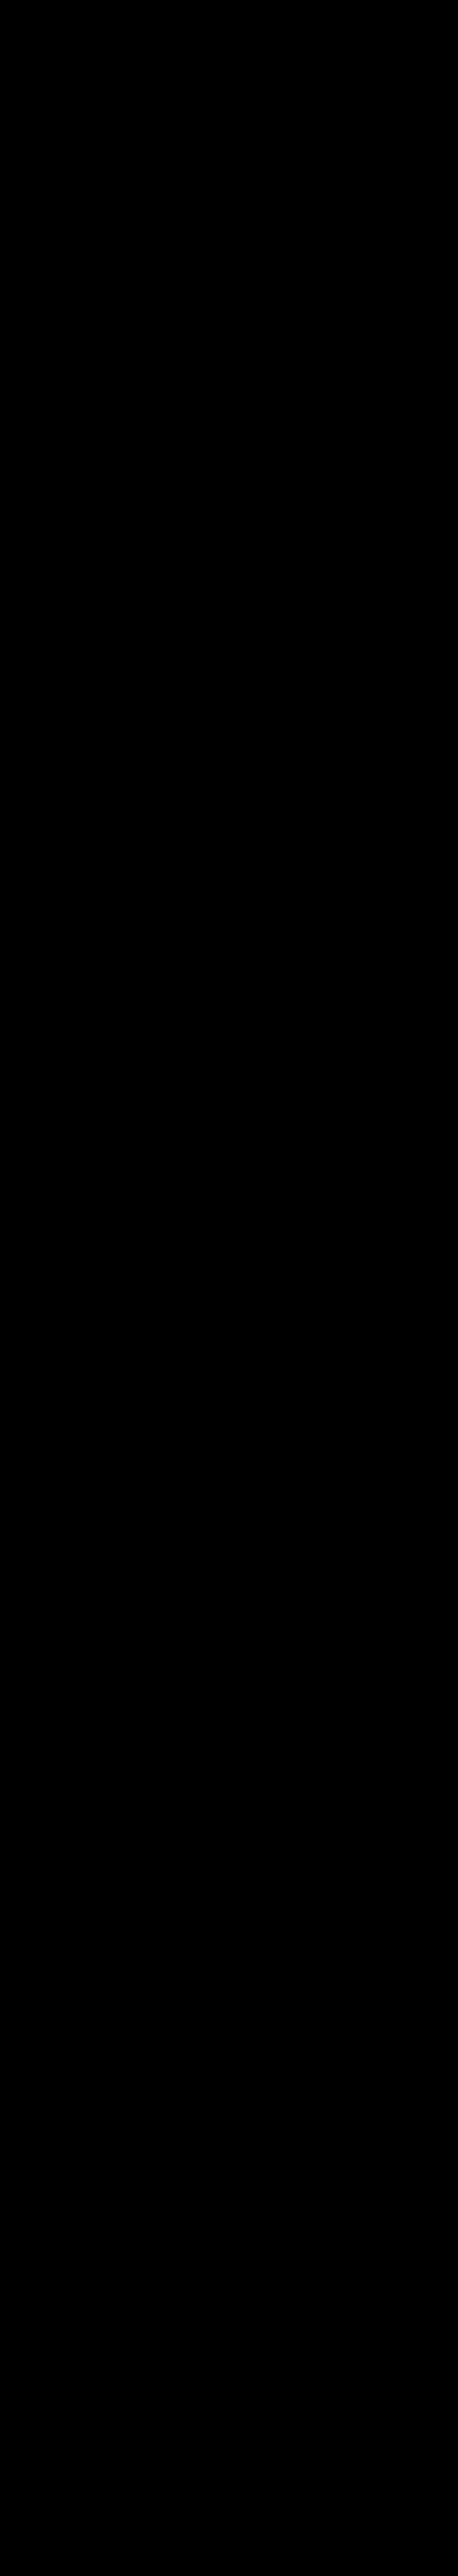

In [11]:
display(contact_sheet)

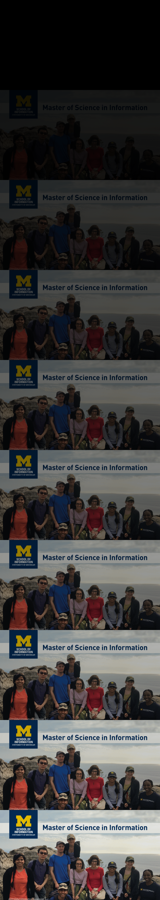

In [12]:
current_location = 0
for img in images:

    contact_sheet.paste(img, (0, current_location) )
    # And update the current_location counter
    current_location=current_location+450

# This contact sheet has gotten big: 4,500 pixels tall! Lets just resize this sheet for display. We can do
# this using the resize() function. This function just takes a tuple of width and height, and we'll resize
# everything down to the size of just two individual images
contact_sheet = contact_sheet.resize((160,900) )
# Now lets just display that composite image
display(contact_sheet)

In [30]:
contact_sheet = PIL.Image.new(first_image.mode,(first_image.width*3, first_image.height*3))

In [31]:
x=0
y=0


In [32]:
for img in images[1:]:
    contact_sheet.paste(img, (x,y))
    if x+first_image.width ==  contact_sheet.width:
        x=0
        y=y+first_image.height
    else :
        x= x+first_image.width
        

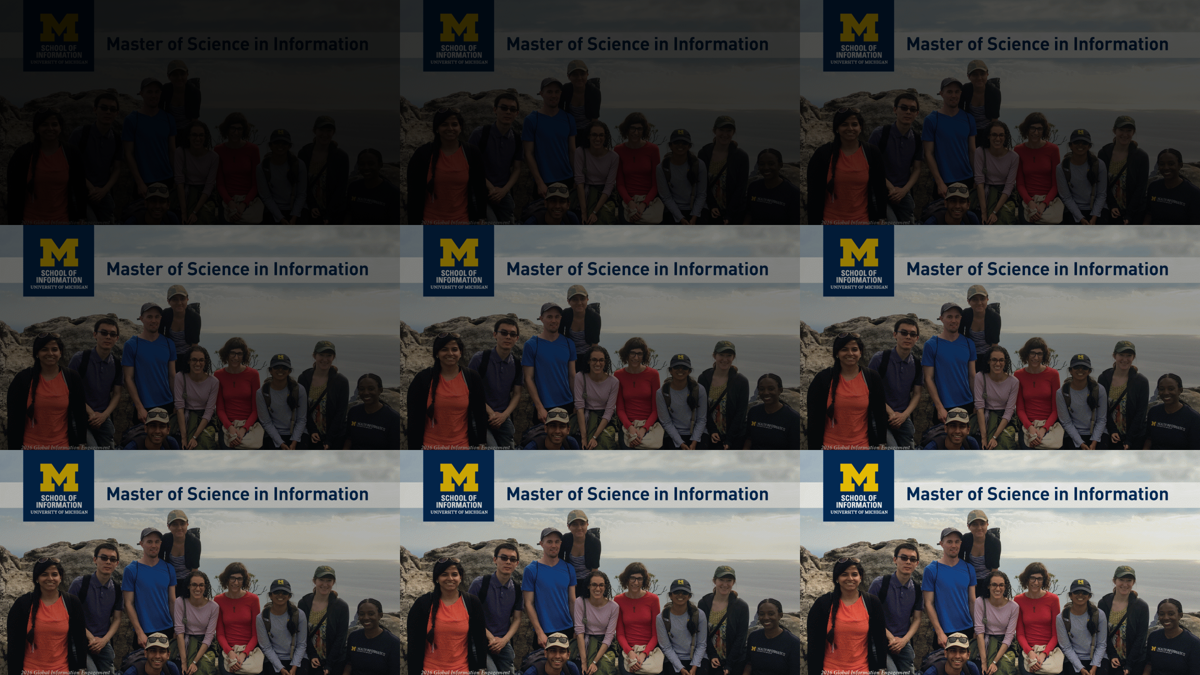

In [33]:

contact_sheet = contact_sheet.resize((int(contact_sheet.width/2), int(contact_sheet.height/2)))
display(contact_sheet)

In [34]:
image.split()

(<PIL.Image.Image image mode=L size=800x450 at 0x7F7FC5FBFCD0>,
 <PIL.Image.Image image mode=L size=800x450 at 0x7F7FC5FBF7C0>,
 <PIL.Image.Image image mode=L size=800x450 at 0x7F7FC5FBFB80>)